## SECTION B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<h3 align='center'>Part (a)</h3>

In [2]:
initial_centroids = np.array([[3.0, 3.0], [2.0, 2.0]])

data = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1],
    [4.5, 2.3], [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0],
    [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], [1.0, 3.0],
    [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1],
    [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
])

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def kmeans(X, centroids, max_iters=100, threshold=1e-4):
    m = X.shape[0]
    k = centroids.shape[0]
    clusters = np.zeros(m, dtype=int)
    # print(f"Total samples: {m}")
    
    for iteration in range(max_iters):
        # Assignment
        for i in range(m):          
            distance = [euclidean_distance(X[i], centroid) for centroid in centroids]
            cluster = np.argmin(distance)
            clusters[i] = cluster

        # Update
        new_centroids = np.zeros((k, X.shape[1]))
        for i in range(k):
            pnts = X[clusters == i]
            if pnts.shape[0] > 0: # Check if cluster is not empty
                new_centroids[i] = np.mean(pnts, axis=0)
            else:
                new_centroids[i] = X[np.random.randint(0, m)] # reinitialize empty cluster to random point in dataset

        # Check for convergence (if centroids do not change significantly)
        if np.sum(np.abs(new_centroids - centroids)) < threshold:
            print(f"Converged after {iteration + 1} iterations.")
            break        
        
        centroids = new_centroids
    
    return clusters, centroids


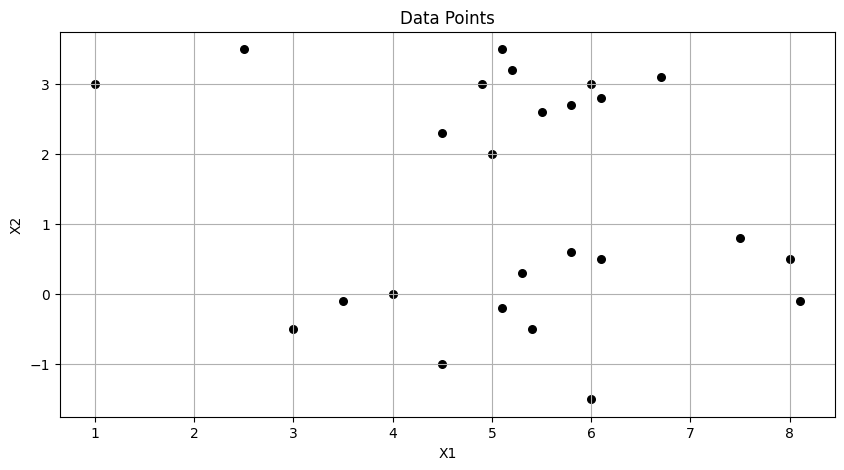

In [3]:
plt.figure(figsize=(10, 5)) 
plt.scatter(data[:, 0], data[:, 1], c='black', marker='o', s=30)
plt.title("Data Points")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()

<h3 align='center'>Part (b)</h3>

Initial Centroids:
 [[3. 3.]
 [2. 2.]]
Initial Clusters:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0]

Converged after 3 iterations.
Final Centroids:
 [[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]
Final Clusters:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0]


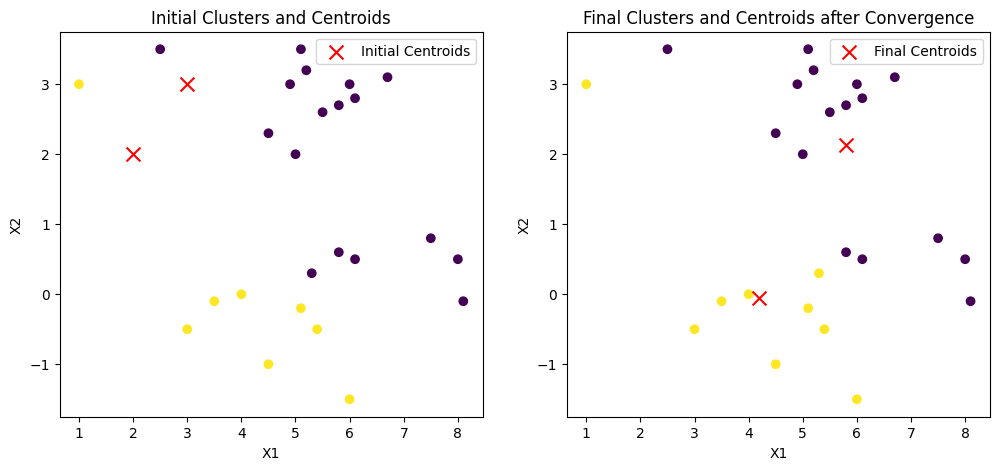

In [4]:
initial_clusters, _ = kmeans(data, initial_centroids, 1)
print("Initial Centroids:\n", initial_centroids)
print("Initial Clusters:\n", initial_clusters)
print()

final_clusters1, final_centroids1 = kmeans(data, initial_centroids)
print("Final Centroids:\n", final_centroids1)
print("Final Clusters:\n", final_clusters1)


plt.figure(figsize=(12, 5))

# Plotting initial clusters and centroids
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=initial_clusters, cmap='viridis', marker='o')
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red', marker='x', s=100, label='Initial Centroids')
plt.title("Initial Clusters and Centroids")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

# Plotting final clusters and centroids
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=final_clusters1, cmap='viridis', marker='o')
plt.scatter(final_centroids1[:, 0], final_centroids1[:, 1], c='red', marker='x', s=100, label='Final Centroids')
plt.title("Final Clusters and Centroids after Convergence")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

plt.show()



<h3 align='center'>Part (c)</h3>

In [5]:
# Select centroids randomly from the data points
np.random.seed(7) # Setting seed for reproducibility
random_centroids = data[np.random.choice(data.shape[0], 2, replace=False)]
random_centroids

array([[4.9, 3. ],
       [4.5, 2.3]])

Random Centroids:
 [[4.9 3. ]
 [4.5 2.3]]
Random Clusters:
 [0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Converged after 3 iterations.
Final Centroids:
 [[ 4.85833333  2.89166667]
 [ 5.56153846 -0.09230769]]
Final Clusters:
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]


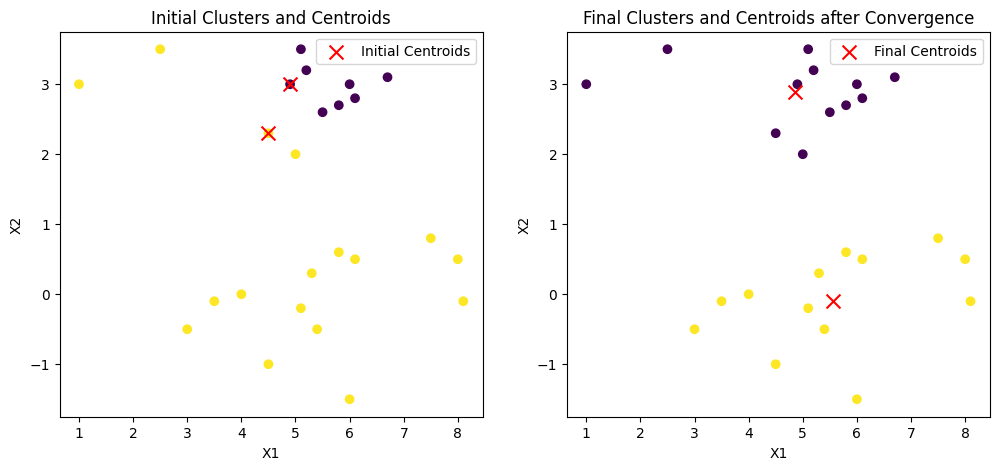

In [6]:
# random_centroids = data[np.random.choice(data.shape[0], 2, replace=False)]
random_clusters, _ = kmeans(data, random_centroids, 1)
print("Random Centroids:\n", random_centroids)
print("Random Clusters:\n", random_clusters)
print()

final_clusters2, final_centroids2 = kmeans(data, random_centroids)
print("Final Centroids:\n", final_centroids2)
print("Final Clusters:\n", final_clusters2)

plt.figure(figsize=(12, 5))

# Plotting random clusters and centroids
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=random_clusters, cmap='viridis', marker='o')
plt.scatter(random_centroids[:, 0], random_centroids[:, 1], c='red', marker='x', s=100, label='Initial Centroids')
plt.title("Initial Clusters and Centroids")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

# Plotting final clusters and centroids
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=final_clusters2, cmap='viridis', marker='o')
plt.scatter(final_centroids2[:, 0], final_centroids2[:, 1], c='red', marker='x', s=100, label='Final Centroids')
plt.title("Final Clusters and Centroids after Convergence")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

plt.show()

In [7]:
def loss(X, clusters, centroids):
    m = X.shape[0]
    loss = 0
    for i in range(m):
        loss += euclidean_distance(X[i], centroids[clusters[i]]) ** 2
    return loss

initial_loss = loss(data, initial_clusters, initial_centroids)
random_loss = loss(data, random_clusters, random_centroids)

print(f"Initial Loss: {initial_loss}")
print(f"Random Loss: {random_loss}")

final_loss1 = loss(data, final_clusters1, final_centroids1)
final_loss2 = loss(data, final_clusters2, final_centroids2)

print(f"Final Loss (Initial Centroids): {final_loss1}")
print(f"Final Loss (Random Centroids): {final_loss2}")

Initial Loss: 301.75
Random Loss: 152.01
Final Loss (Initial Centroids): 83.67222222222222
Final Loss (Random Centroids): 67.15833333333335


<h3 align='center'>Part (d)</h3>

Converged after 2 iterations.
Converged after 6 iterations.
Converged after 5 iterations.
Converged after 5 iterations.
Converged after 2 iterations.
Converged after 4 iterations.
Converged after 3 iterations.
Converged after 5 iterations.
Converged after 4 iterations.
Converged after 3 iterations.


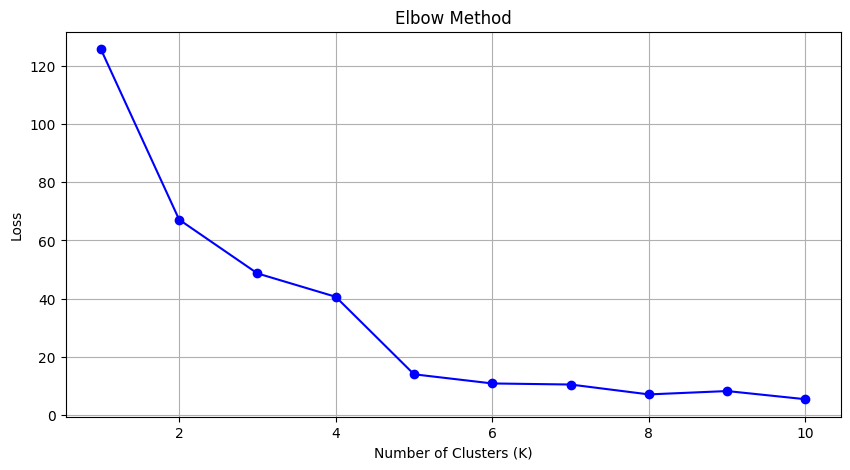

In [8]:
def elbow_method(X, max_k=10):
    wcss_losses = []
    np.random.seed(22) # Setting seed for reproducibility
    for k in range(1, max_k + 1):
        centroids = X[np.random.choice(X.shape[0], k, replace=False)]
        clusters, final_centroids = kmeans(X, centroids)
        wcss_losses.append(loss(X, clusters, final_centroids))
    return wcss_losses

wcss_losses = elbow_method(data, 10)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_losses, marker='o', color='b')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


Converged after 5 iterations.


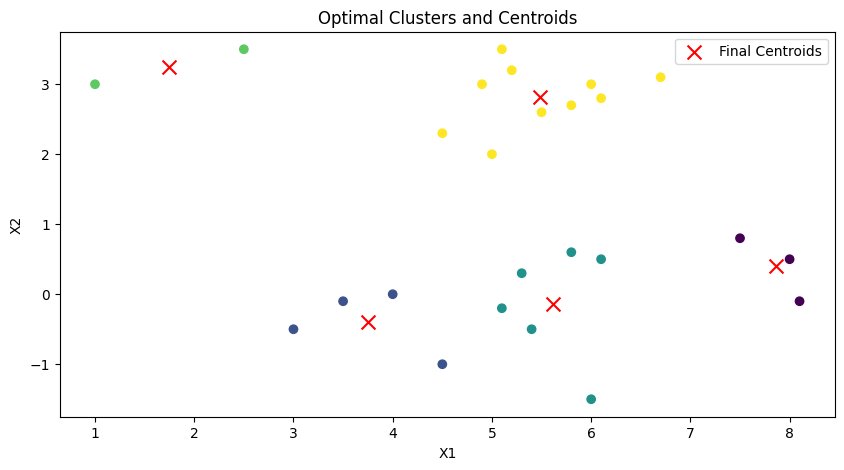

In [9]:
M = 5 # optimal number of clusters (from elbow method) - from visual inspection

np.random.seed(33) # Setting seed for reproducibility
optimal_centroids = data[np.random.choice(data.shape[0], M, replace=False)]
optimal_clusters, optimal_final_centroids = kmeans(data, optimal_centroids)

plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1], c=optimal_clusters, cmap='viridis', marker='o')
plt.scatter(optimal_final_centroids[:, 0], optimal_final_centroids[:, 1], c='red', marker='x', s=100, label='Final Centroids')
plt.title("Optimal Clusters and Centroids")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()

Optimal Centroids:
 [[ 5.8  0.6]
 [ 4.5 -1. ]
 [ 5.1 -0.2]
 [ 4.5  2.3]
 [ 6.7  3.1]]
Optimal Clusters:
 [3 3 4 4 4 3 4 3 3 3 0 0 0 3 3 1 1 2 1 1 2 0 2 2 0]

Converged after 5 iterations.
Final Optimal Centroids:
 [[ 7.86666667  0.4       ]
 [ 3.75       -0.4       ]
 [ 5.61666667 -0.13333333]
 [ 1.75        3.25      ]
 [ 5.48        2.82      ]]
Final Optimal Clusters:
 [4 4 4 4 4 4 4 4 4 4 0 0 0 3 3 1 1 2 2 1 1 2 2 2 2]


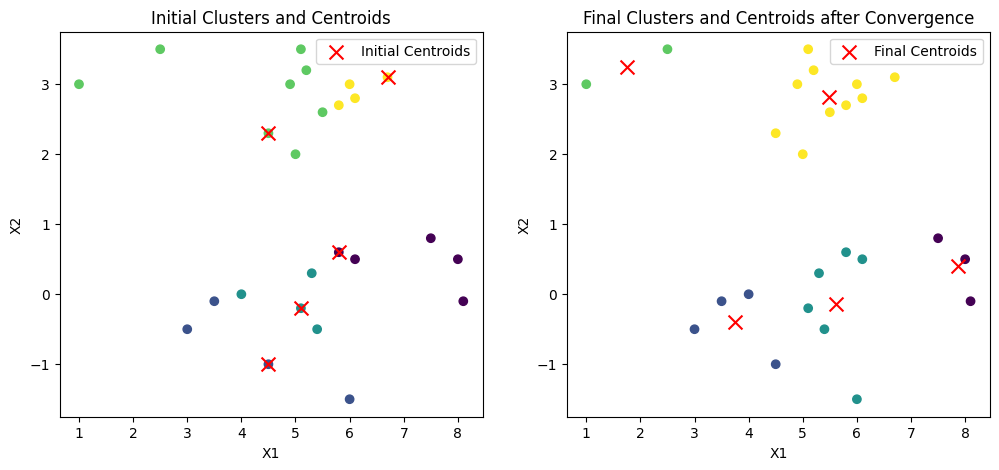

In [10]:
optimal_clusters, _ = kmeans(data, optimal_centroids, 1)
print("Optimal Centroids:\n", optimal_centroids)
print("Optimal Clusters:\n", optimal_clusters)
print()

final_optimal_clusters, final_optimal_centroids = kmeans(data, optimal_centroids)
print("Final Optimal Centroids:\n", final_optimal_centroids)
print("Final Optimal Clusters:\n", final_optimal_clusters)

plt.figure(figsize=(12, 5))

# Plotting optimal clusters and centroids
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=optimal_clusters, cmap='viridis', marker='o')
plt.scatter(optimal_centroids[:, 0], optimal_centroids[:, 1], c='red', marker='x', s=100, label='Initial Centroids')
plt.title("Initial Clusters and Centroids")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

# Plotting final optimal clusters and centroids
plt.subplot(1, 2, 2)
plt.scatter(data[:, 0], data[:, 1], c=final_optimal_clusters, cmap='viridis', marker='o')
plt.scatter(final_optimal_centroids[:, 0], final_optimal_centroids[:, 1], c='red', marker='x', s=100, label='Final Centroids')
plt.title("Final Clusters and Centroids after Convergence")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

plt.show()

In [11]:
initial_optimal_loss = loss(data, optimal_clusters, optimal_centroids)
final_optimal_loss = loss(data, final_optimal_clusters, final_optimal_centroids)

print(f"Initial Optimal Loss: {initial_optimal_loss}")
print(f"Final Optimal Loss: {final_optimal_loss}")

Initial Optimal Loss: 47.470000000000006
Final Optimal Loss: 13.460333333333333
